In [1]:
#This code computes medians of errors and uses bootstrapping to calculate errors of medians

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import bootstrap

In [4]:

resolution='0.5x'

if resolution=='1x':
    errors_approximation=pd.read_csv('../data/'+ 'all_errors' + '.csv',index_col=0)
                    
elif resolution=='0.5x':
    errors_approximation=pd.read_csv('../data/'+ 'all_errors_approximation_0.5x' + '.csv',index_col=0)
                    
elif resolution=='2x':
    errors_approximation=pd.read_csv('../data/'+ 'all_errors_approximation_0.5x' + '.csv',index_col=0)



display(errors_approximation)

#columns=["sigma", "function","rmse_nn_train", "rmse_nn_test", "rmse_mdl_train", "rmse_mdl_test"]
columns=["sigma", "function","rmse_nn_train", "rmse_nn_test", "rmse_mdl_train", "rmse_mdl_test", "n", "r"]
errors_approximation=errors_approximation[columns]
display(errors_approximation)



,sigma,function,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,leaky_ReLU,0.016896,0.029447,0.001032,0.063266,0.022505,0.036252,0.001275,0.082951,0,0
1,0.0,leaky_ReLU,0.016883,0.231939,0.023344,0.269050,0.021710,0.254277,0.028029,0.296079,1,0
2,0.0,leaky_ReLU,0.018241,0.103689,0.014257,0.086586,0.022336,0.135278,0.016435,0.110833,2,0
3,0.0,leaky_ReLU,0.079068,0.335331,0.004799,0.203640,0.094522,0.347979,0.006336,0.246610,3,0
4,0.0,leaky_ReLU,0.010155,0.044933,0.003880,0.506176,0.012755,0.050680,0.004796,0.726888,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.2,tanh,0.104493,0.377508,0.060303,0.831309,0.135553,0.394259,0.106253,0.890840,5,2
656,0.2,tanh,0.118410,0.133384,0.044108,0.263869,0.156538,0.136299,0.066985,0.266259,6,2
657,0.2,tanh,0.157235,0.070630,0.094496,0.012186,0.203894,0.077455,0.113941,0.017034,7,2
658,0.2,tanh,0.151484,0.143675,0.163269,0.748055,0.192902,0.170953,0.224000,0.750894,8,2


,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,leaky_ReLU,0.022505,0.036252,0.001275,0.082951,0,0
1,0.0,leaky_ReLU,0.021710,0.254277,0.028029,0.296079,1,0
2,0.0,leaky_ReLU,0.022336,0.135278,0.016435,0.110833,2,0
3,0.0,leaky_ReLU,0.094522,0.347979,0.006336,0.246610,3,0
4,0.0,leaky_ReLU,0.012755,0.050680,0.004796,0.726888,4,0
...,...,...,...,...,...,...,...,...
655,0.2,tanh,0.135553,0.394259,0.106253,0.890840,5,2
656,0.2,tanh,0.156538,0.136299,0.066985,0.266259,6,2
657,0.2,tanh,0.203894,0.077455,0.113941,0.017034,7,2
658,0.2,tanh,0.192902,0.170953,0.224000,0.750894,8,2


In [3]:
#Melt dataframe to plot
#errors_approximation=pd.melt(errors_approximation,id_vars=["sigma","function", "rmse_nn_test","rmse_mdl_test", "n", "r"], var_name="error_train",value_name= "value_train")
#errors_approximation=pd.melt(errors_approximation,id_vars=["sigma","function",  "error_train", "value_train", "n", "r"], var_name="error_test", value_name= "value_test")



In [5]:
#Melt dataframe to plot
errors_approximation_train=errors_approximation[["sigma","function", "rmse_nn_train", "rmse_mdl_train","n", "r"]]
errors_approximation_train=pd.melt(errors_approximation_train,id_vars=["sigma","function", "n", "r"], var_name="error_train",value_name= "value_train")
display(errors_approximation_train)

errors_approximation_test=errors_approximation[["sigma","function", "rmse_nn_test", "rmse_mdl_test","n", "r"]]
errors_approximation_test=pd.melt(errors_approximation_test,id_vars= ["sigma","function", "n", "r"], var_name="error_test", value_name= "value_test")
display(errors_approximation_test)


,sigma,function,n,r,error_train,value_train
0,0.0,leaky_ReLU,0,0,rmse_nn_train,0.022505
1,0.0,leaky_ReLU,1,0,rmse_nn_train,0.021710
2,0.0,leaky_ReLU,2,0,rmse_nn_train,0.022336
3,0.0,leaky_ReLU,3,0,rmse_nn_train,0.094522
4,0.0,leaky_ReLU,4,0,rmse_nn_train,0.012755
...,...,...,...,...,...,...
1315,0.2,tanh,5,2,rmse_mdl_train,0.106253
1316,0.2,tanh,6,2,rmse_mdl_train,0.066985
1317,0.2,tanh,7,2,rmse_mdl_train,0.113941
1318,0.2,tanh,8,2,rmse_mdl_train,0.224000


,sigma,function,n,r,error_test,value_test
0,0.0,leaky_ReLU,0,0,rmse_nn_test,0.036252
1,0.0,leaky_ReLU,1,0,rmse_nn_test,0.254277
2,0.0,leaky_ReLU,2,0,rmse_nn_test,0.135278
3,0.0,leaky_ReLU,3,0,rmse_nn_test,0.347979
4,0.0,leaky_ReLU,4,0,rmse_nn_test,0.050680
...,...,...,...,...,...,...
1315,0.2,tanh,5,2,rmse_mdl_test,0.890840
1316,0.2,tanh,6,2,rmse_mdl_test,0.266259
1317,0.2,tanh,7,2,rmse_mdl_test,0.017034
1318,0.2,tanh,8,2,rmse_mdl_test,0.750894


In [6]:
errors_tanh_train=errors_approximation_train[errors_approximation_train['function']=='tanh']
errors_tanh_test=errors_approximation_test[errors_approximation_test['function']=='tanh']

errors_leaky_train=errors_approximation_train[errors_approximation_train['function']=='leaky_ReLU']
errors_leaky_test=errors_approximation_test[errors_approximation_test['function']=='leaky_ReLU']

display(errors_tanh_train)
display(errors_leaky_train)

,sigma,function,n,r,error_train,value_train
330,0.0,tanh,0,0,rmse_nn_train,0.049367
331,0.0,tanh,1,0,rmse_nn_train,0.014795
332,0.0,tanh,2,0,rmse_nn_train,0.125368
333,0.0,tanh,3,0,rmse_nn_train,0.068102
334,0.0,tanh,4,0,rmse_nn_train,0.014542
...,...,...,...,...,...,...
1315,0.2,tanh,5,2,rmse_mdl_train,0.106253
1316,0.2,tanh,6,2,rmse_mdl_train,0.066985
1317,0.2,tanh,7,2,rmse_mdl_train,0.113941
1318,0.2,tanh,8,2,rmse_mdl_train,0.224000


,sigma,function,n,r,error_train,value_train
0,0.0,leaky_ReLU,0,0,rmse_nn_train,0.022505
1,0.0,leaky_ReLU,1,0,rmse_nn_train,0.021710
2,0.0,leaky_ReLU,2,0,rmse_nn_train,0.022336
3,0.0,leaky_ReLU,3,0,rmse_nn_train,0.094522
4,0.0,leaky_ReLU,4,0,rmse_nn_train,0.012755
...,...,...,...,...,...,...
985,0.2,leaky_ReLU,5,2,rmse_mdl_train,0.018273
986,0.2,leaky_ReLU,6,2,rmse_mdl_train,0.144095
987,0.2,leaky_ReLU,7,2,rmse_mdl_train,0.145164
988,0.2,leaky_ReLU,8,2,rmse_mdl_train,0.120214


In [7]:
#Plot results
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 8*cm; height=6*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=12;size_ticks=10;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          
m_size=6

output_path='../results/'

resamples=100000; bs_seed=1111
ymin=2e-4;ymax=0.75

<Figure size 944.882x708.661 with 0 Axes>

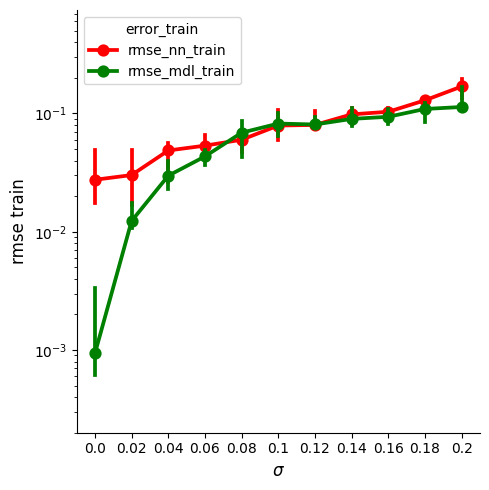

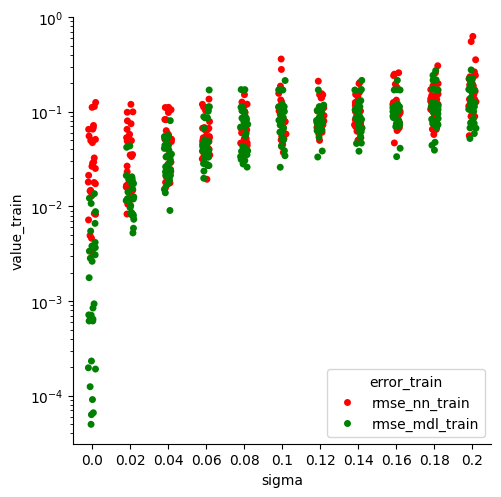

In [8]:
#tanh - rmse train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_tanh_train, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse train',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)

plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='approximation_medians_tanh_' + resolution + '_resolution' 
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Individual predictions
sns.catplot(data=errors_tanh_train, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")

<Figure size 944.882x708.661 with 0 Axes>

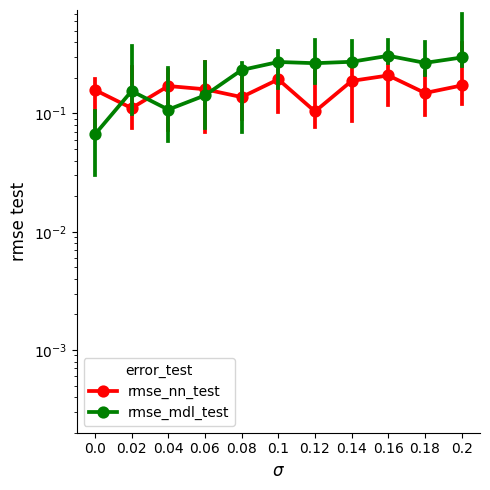

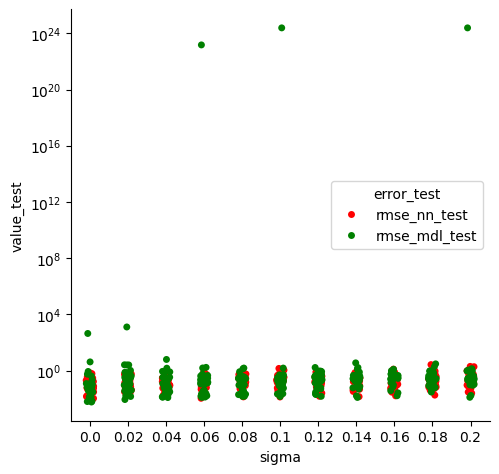

In [12]:
#tanh - rmse test
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_tanh_test, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse test',fontsize=size_axis)


plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='test_medians_tanh_' + resolution + '_resolution' 
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Individual predictions
sns.catplot(data=errors_tanh_test, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")

<Figure size 944.882x708.661 with 0 Axes>

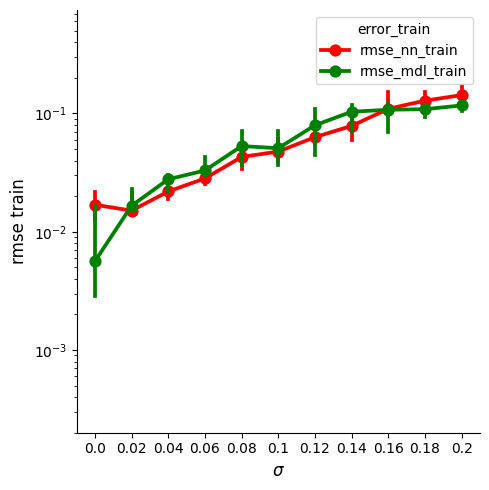

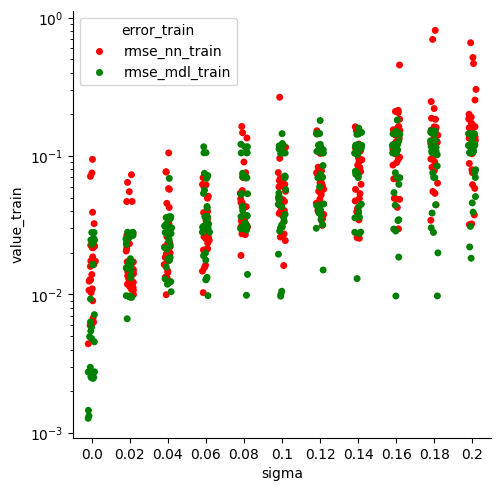

In [10]:
#leaky - rmse train
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_leaky_train, x='sigma', y='value_train', hue="error_train", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)


plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='approximation_medians_leaky_' + resolution + '_resolution' 
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Individual predictions
sns.catplot(data=errors_leaky_train, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")

ValueError: Could not interpret value `error_train` for `hue`. An entry with this name does not appear in `data`.

<Figure size 944.882x708.661 with 0 Axes>

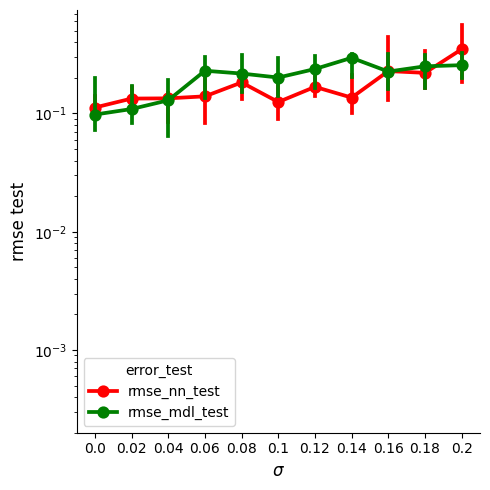

In [11]:
#leaky - rmse test
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_leaky_test, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse test',fontsize=size_axis)

plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='test_medians_leaky_' + resolution + '_resolution' 
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Individual predictions
sns.catplot(data=errors_leaky_test, x='sigma', y='value_test', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")